In [1]:
# Import Essential Libraries

import torch
import torch.nn.functional as F
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os


In [2]:
# Functions to Compute Gradients For Images, Harris Response and Detection of Corners

def compute_gradients(image):
    sobel_x = torch.tensor([[1, 0, -1], [2, 0, -2], [1, 0, -1]], dtype=torch.float32)
    sobel_y = torch.tensor([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], dtype=torch.float32)

    grad_x = F.conv2d(image.unsqueeze(0).unsqueeze(0), sobel_x.unsqueeze(0).unsqueeze(0))
    grad_y = F.conv2d(image.unsqueeze(0).unsqueeze(0), sobel_y.unsqueeze(0).unsqueeze(0))

    return grad_x.squeeze(), grad_y.squeeze()

def compute_harris_response(grad_x, grad_y, k=0.04):
    Ixx = grad_x ** 2
    Iyy = grad_y ** 2
    Ixy = grad_x * grad_y

    Sxx = F.conv2d(Ixx.unsqueeze(0).unsqueeze(0), torch.ones(3, 3).unsqueeze(0).unsqueeze(0))
    Syy = F.conv2d(Iyy.unsqueeze(0).unsqueeze(0), torch.ones(3, 3).unsqueeze(0).unsqueeze(0))
    Sxy = F.conv2d(Ixy.unsqueeze(0).unsqueeze(0), torch.ones(3, 3).unsqueeze(0).unsqueeze(0))

    det_M = (Sxx * Syy) - (Sxy ** 2)
    trace_M = Sxx + Syy

    harris_response = det_M - k * (trace_M ** 2)

    return harris_response.squeeze()

def detect_corners(harris_response, threshold=0.05):
    corners = torch.zeros_like(harris_response)
    corners[harris_response > threshold * harris_response.max()] = 1
    return corners


In [3]:
# Detect Harris Corner And Display Results

def harris_corner_detection_folder(folder_path, window_size=3, threshold=0.05):
    image_files = os.listdir(folder_path)
    for file in image_files:
        if file.endswith(('.jpg', '.png', '.jpeg')):
            image_path = os.path.join(folder_path, file)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            image_tensor = torch.tensor(image, dtype=torch.float32) / 255.0

            # Compute gradients
            grad_x, grad_y = compute_gradients(image_tensor)

            # Compute Harris response
            harris_response = compute_harris_response(grad_x, grad_y)

            # Detect corners
            corners = detect_corners(harris_response, threshold)

            # Display results
            plt.figure(figsize=(20, 7))
            plt.subplot(1, 3, 1)
            plt.imshow(image)
            plt.title('Original Image')
            plt.axis('off')

            plt.subplot(1, 3, 2)
            plt.imshow(image, cmap='gray')
            plt.title('Gray Image')
            plt.axis('off')

            plt.subplot(1, 3, 3)
            plt.imshow(image, cmap='gray')
            plt.imshow(corners, cmap='jet', alpha=0.7)
            plt.title('Harris Corner Detection')
            plt.axis('off')

            plt.show()

           


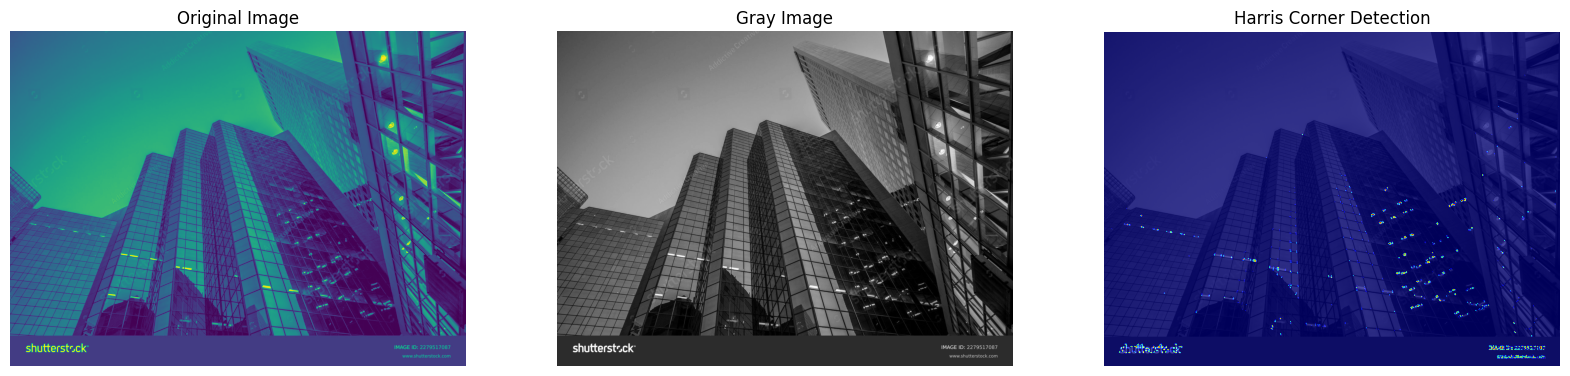

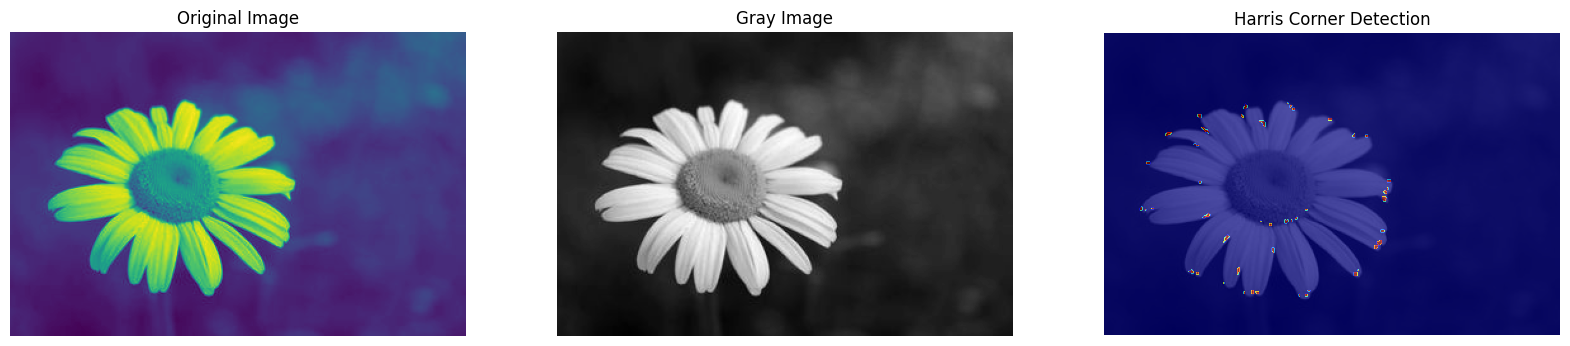

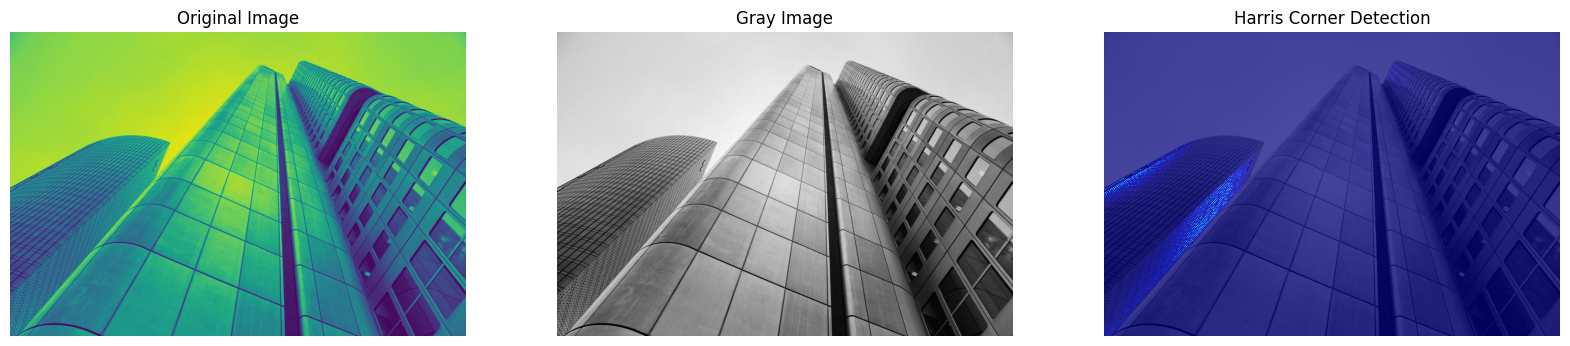

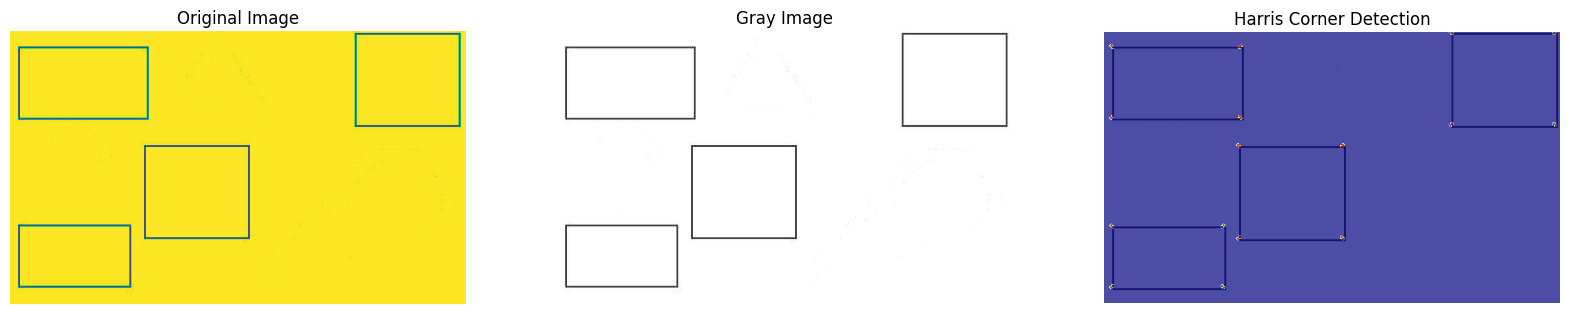

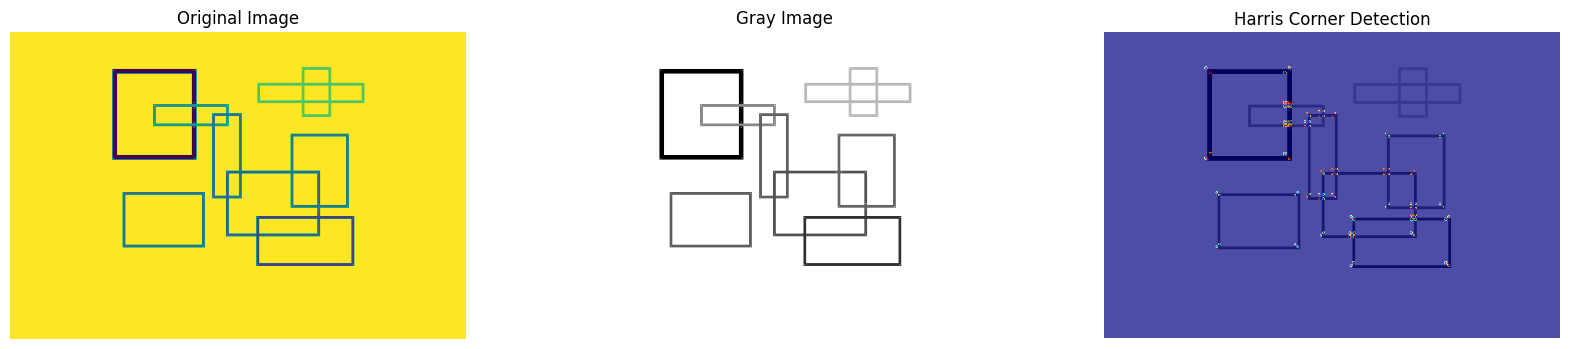

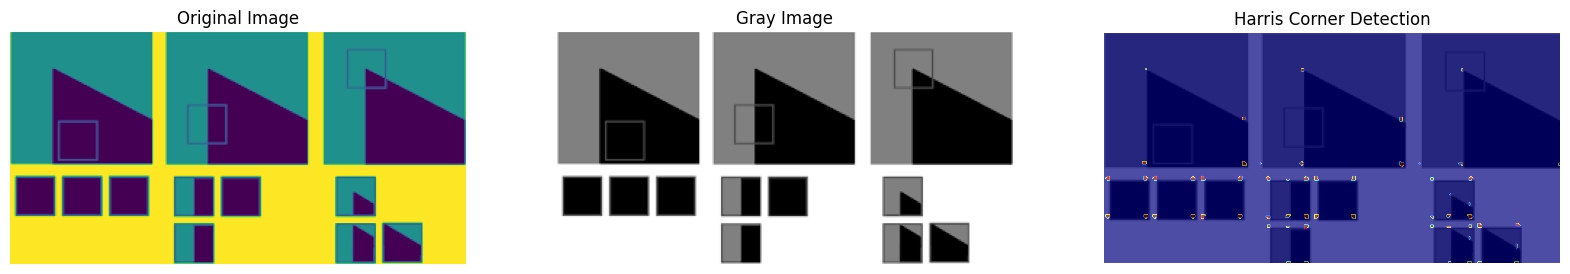

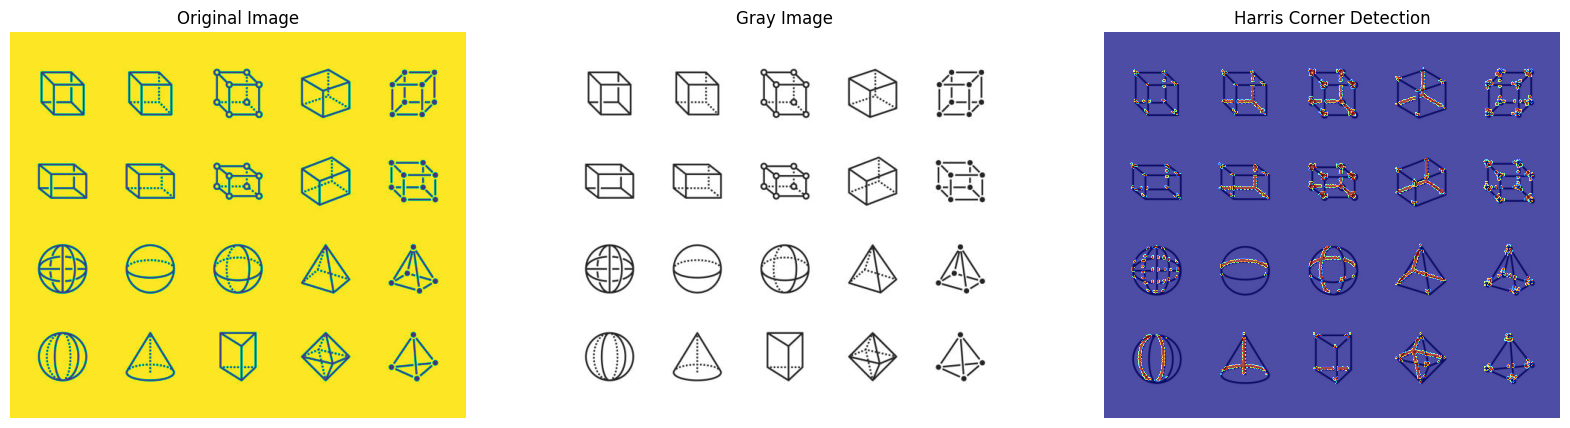

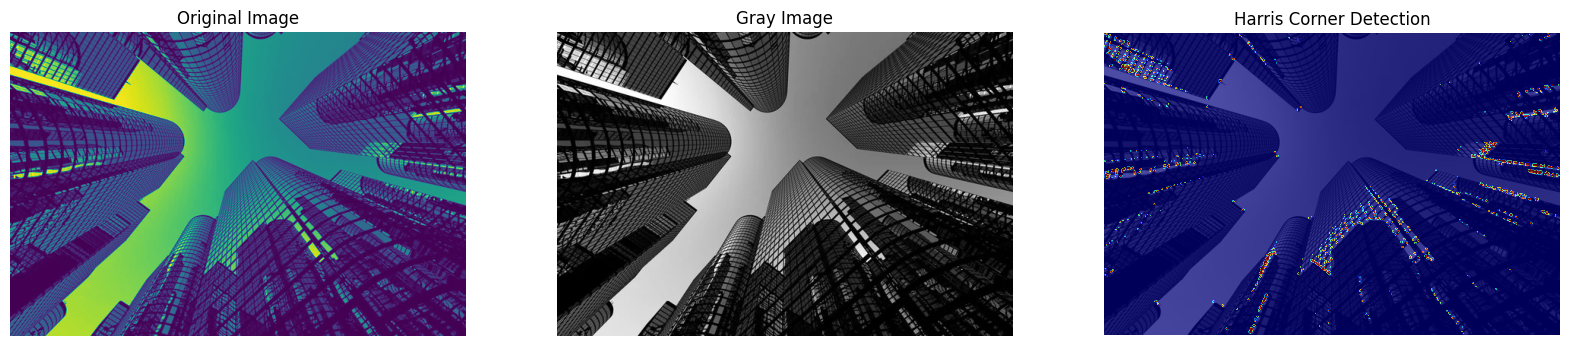

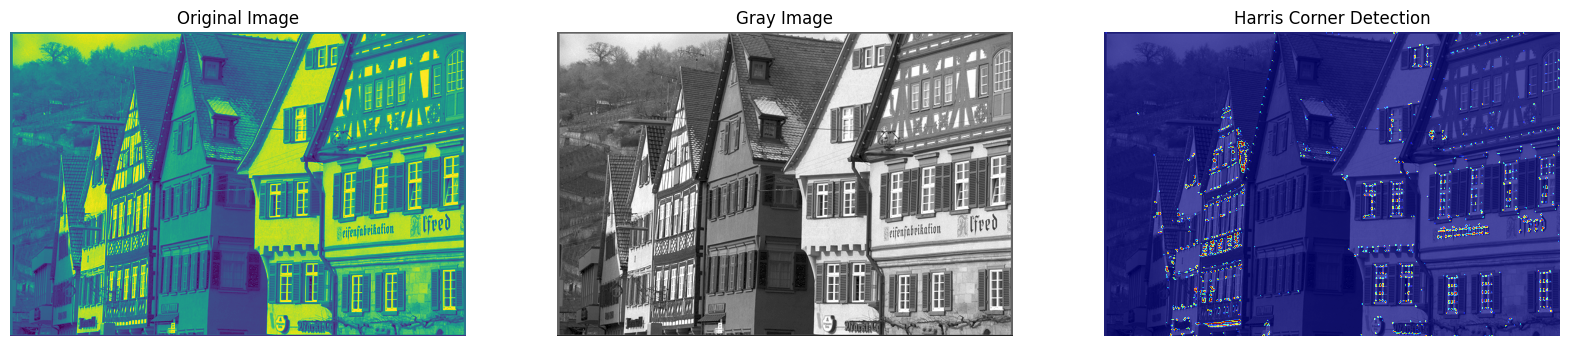

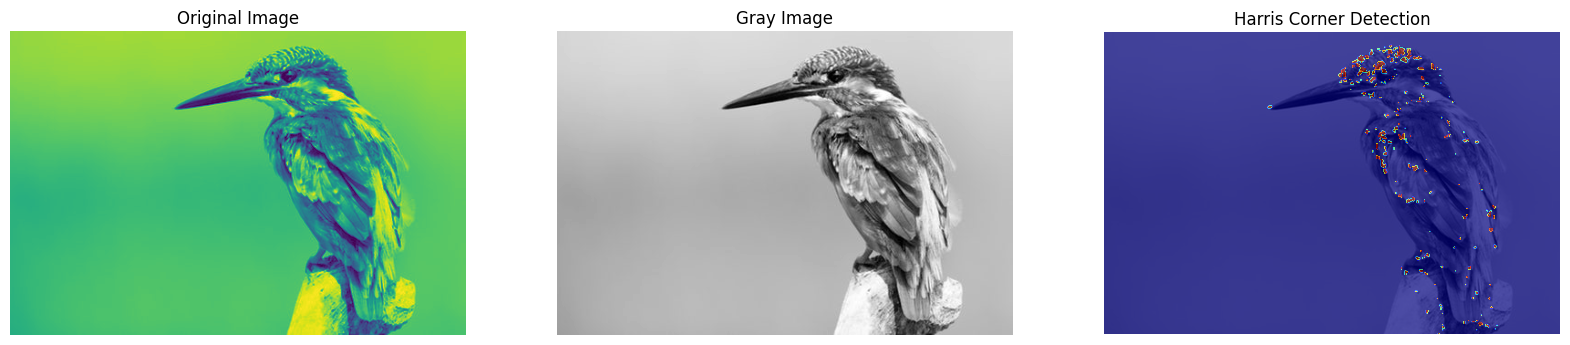

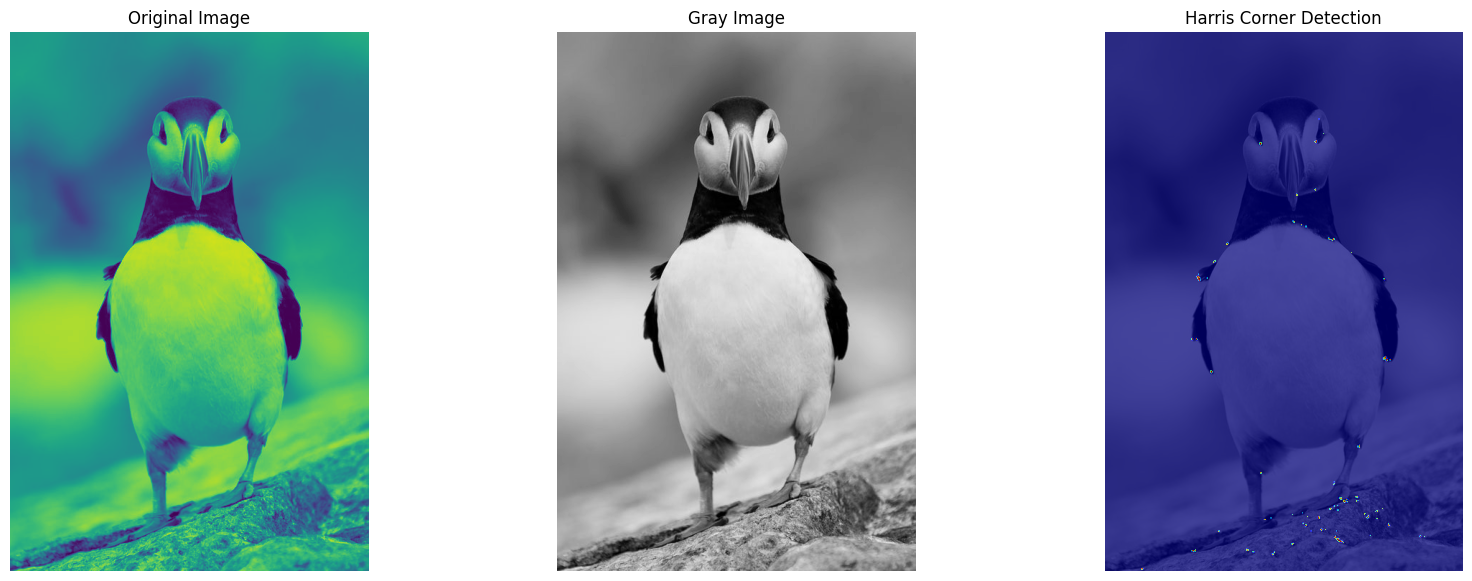

In [4]:
# Define a Main Function 

if __name__ == "__main__":
    folder_path = '/home/planck/Ravi_Saxena/Python_Codes/CV/Ass_CV/Data_1/Question 1'
    harris_corner_detection_folder(folder_path, window_size=3, threshold=0.05)
